In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
data=pd.read_csv("Market.csv",header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#!pip install mlxtend
#!pip install pyECLAT


# apriori

In [21]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder


In [22]:
#преобразование таблицы
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])
    
from itertools import permutations

flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))

if 'nan' in items: items.remove('nan')
    
rules = list(permutations(items, 2))
from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder().fit(transactions)
onehot = encoder.transform(transactions)

onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)
onehot.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [23]:
#onehot.info()

In [24]:
ap = apriori(onehot, min_support=0.004, use_colnames=True)
rules = association_rules(ap, metric="confidence", min_threshold=0.004)
rules = rules[['antecedents', 'consequents','support', 'confidence','lift']]
print(rules.sort_values(by = 'support',ascending=False).head(10))

          antecedents      consequents   support  confidence      lift
1034  (mineral water)      (spaghetti)  0.059725    0.250559  1.439085
1035      (spaghetti)  (mineral water)  0.059725    0.343032  1.439085
337       (chocolate)  (mineral water)  0.052660    0.321400  1.348332
336   (mineral water)      (chocolate)  0.052660    0.220917  1.348332
497            (eggs)  (mineral water)  0.050927    0.283383  1.188845
496   (mineral water)           (eggs)  0.050927    0.213647  1.188845
976   (mineral water)           (milk)  0.047994    0.201342  1.553774
977            (milk)  (mineral water)  0.047994    0.370370  1.553774
859   (mineral water)    (ground beef)  0.040928    0.171700  1.747522
858     (ground beef)  (mineral water)  0.040928    0.416554  1.747522


In [25]:
#теперь нормальное сравнение

# ECLAT

In [26]:
from pyECLAT import ECLAT
eclat = ECLAT(data, verbose=False)
get_ECLAT_indexes, get_ECLAT_supports =eclat.fit(min_support=0.004, min_combination=2, max_combination=2, separator='+')
#print(get_ECLAT_indexes)

Combination 2 by 2


6441it [01:37, 66.15it/s] 


In [27]:
def separate(output):
    lhs         = [result.split('+')[0] for result in list(output)]
    rhs         = [result.split('+')[1] for result in list(output)]
    support    = [result for result in output.values()]
    return list(zip(lhs, rhs, support))

output_DataFrame = pd.DataFrame(separate(get_ECLAT_supports),
            columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support'])

output_DataFrame.sort_values(by = 'Support',ascending=False).head(10)

,Left_Hand_Side,Right_Hand_Side,Support
442,mineral water,spaghetti,0.059725
78,chocolate,mineral water,0.052660
423,mineral water,eggs,0.050927
417,mineral water,milk,0.047994
276,ground beef,mineral water,0.040928
291,ground beef,spaghetti,0.039195
102,chocolate,spaghetti,0.039195
533,eggs,spaghetti,0.036528
530,eggs,french fries,0.036395
375,frozen vegetables,mineral water,0.035729


# fp-growth

In [28]:
#ap = apriori(onehot, min_support=0.004, use_colnames=True)
rules = association_rules(ap, metric="confidence", min_threshold=0.004)
rules = rules[['antecedents', 'consequents','support', 'confidence','lift']]
print(rules.sort_values(by = 'support',ascending=False).head(10))

          antecedents      consequents   support  confidence      lift
1034  (mineral water)      (spaghetti)  0.059725    0.250559  1.439085
1035      (spaghetti)  (mineral water)  0.059725    0.343032  1.439085
337       (chocolate)  (mineral water)  0.052660    0.321400  1.348332
336   (mineral water)      (chocolate)  0.052660    0.220917  1.348332
497            (eggs)  (mineral water)  0.050927    0.283383  1.188845
496   (mineral water)           (eggs)  0.050927    0.213647  1.188845
976   (mineral water)           (milk)  0.047994    0.201342  1.553774
977            (milk)  (mineral water)  0.047994    0.370370  1.553774
859   (mineral water)    (ground beef)  0.040928    0.171700  1.747522
858     (ground beef)  (mineral water)  0.040928    0.416554  1.747522


In [29]:
from mlxtend.frequent_patterns import fpgrowth
fp =fpgrowth(onehot, min_support=0.004, use_colnames=True)
rules = association_rules(fp, metric="confidence", min_threshold=0.004)
rules = rules[['antecedents', 'consequents','support', 'confidence','lift']]
rules.sort_values(by = 'support',ascending=False)

,antecedents,consequents,support,confidence,lift
1310,(mineral water),(spaghetti),0.059725,0.250559,1.439085
1311,(spaghetti),(mineral water),0.059725,0.343032,1.439085
1662,(mineral water),(chocolate),0.052660,0.220917,1.348332
1663,(chocolate),(mineral water),0.052660,0.321400,1.348332
702,(mineral water),(eggs),0.050927,0.213647,1.188845
...,...,...,...,...,...
1835,(green tea),(oil),0.004133,0.031282,1.356317
1830,(milk),(oil),0.004133,0.031893,1.382829
1831,(oil),(milk),0.004133,0.179191,1.382829
2803,(french wine),(pancakes),0.004133,0.183432,1.929766


#################################################
# Сравнение работы алгоритмов

In [30]:
from datetime import datetime
import time
from mlxtend.frequent_patterns import apriori, association_rules
from pyECLAT import ECLAT
from mlxtend.frequent_patterns import fpgrowth

import timeit

alg = [fpgrowth, apriori, ECLAT]

fpgrowth_times = []
apriori_times = []
ECLAT_times = []

#size = 10
#sizes = [7000, 3000, 2000,100,10,5]
sizes = [500, 1000, 2000,4000,7000]

rs = []
    
for size in sizes:
        #rs.append(list(apriori(records[:size], min_support=0.003)))
        apriori_times.append(timeit.timeit(
            lambda: apriori(onehot[:size], min_support=0.003, use_colnames=False),
            number=1))
        
        fpgrowth_times.append(timeit.timeit(
            lambda: fpgrowth(onehot[:size], min_support=0.003, use_colnames=False),
            number=1))
        
        ECLAT_times.append(timeit.timeit(
            lambda: ECLAT(data[:size], verbose=False).fit(min_support=0.003, min_combination=2, max_combination=2),
            number=1
        ))
        
        '''    eclat = ECLAT(data, verbose=True)
    time_eclat = timeit.timeit(
        lambda: eclat.fit(min_support=0.03, min_combination=2, max_combination=3),
        number=1
    )'''
        
#print(apriori_times, fpgrowth_times, ECLAT_times)

Combination 2 by 2


5778it [01:24, 68.46it/s] 


Combination 2 by 2


6105it [01:53, 53.59it/s] 


Combination 2 by 2


6555it [01:46, 61.79it/s] 


Combination 2 by 2


6555it [01:52, 58.07it/s] 


Combination 2 by 2


6555it [01:35, 68.76it/s] 


In [31]:
print(apriori_times, sizes)

[0.16031241999917256, 0.5536289640003815, 0.7329572000016924, 0.687456335999741, 1.1440953810015344] [500, 1000, 2000, 4000, 7000]


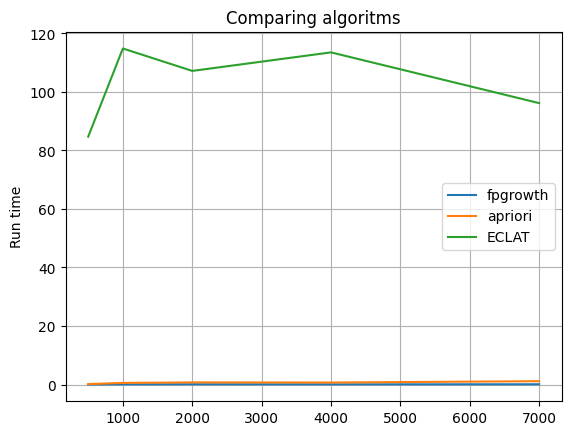

In [32]:
import matplotlib.pyplot as plt


plt.ylabel("Run time")
plt.title('Comparing algoritms')
plt.plot(sizes, fpgrowth_times, label='fpgrowth')
plt.plot(sizes, apriori_times, label='apriori')
plt.plot(sizes, ECLAT_times, label='ECLAT')
plt.legend()
plt.grid(True)
plt.show()


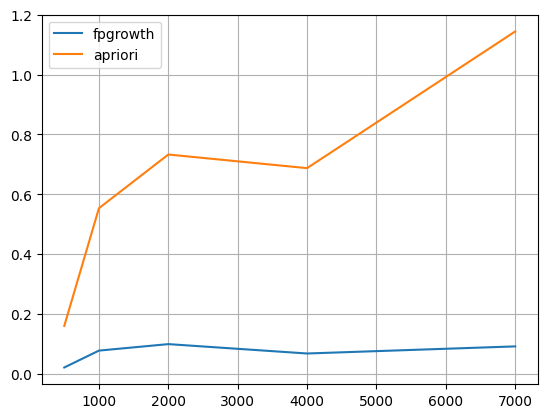

In [33]:
plt.plot(sizes, fpgrowth_times, label='fpgrowth')
plt.plot(sizes, apriori_times, label='apriori')
plt.legend()
plt.grid(True)
plt.show()

In [34]:

fpgrowth_times1 = []
apriori_times1 = []
ECLAT_times1 = []
l=[0.09,0.05,0.03,0.01, 0.005]

    
for i in l:
        apriori_times1.append(timeit.timeit(
            lambda: apriori(onehot, min_support=i, use_colnames=True),
            number=1))
        
        fpgrowth_times1.append(timeit.timeit(
            lambda: fpgrowth(onehot, min_support=i, use_colnames=True),
            number=1))
        
        ECLAT_times1.append(timeit.timeit(
            lambda: ECLAT(data, verbose=False).fit(min_support=i, min_combination=2, max_combination=2),
            number=1
        ))
 

Combination 2 by 2


45it [00:01, 43.35it/s]


Combination 2 by 2


300it [00:06, 43.17it/s]


Combination 2 by 2


630it [00:08, 78.55it/s] 


Combination 2 by 2


2775it [00:37, 73.47it/s] 


Combination 2 by 2


5050it [01:15, 67.19it/s] 


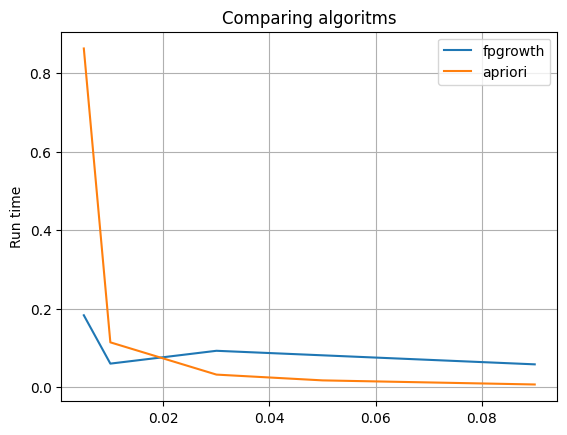

In [35]:

plt.ylabel("Run time")
plt.title('Comparing algoritms')
plt.plot(l, fpgrowth_times1, label='fpgrowth')
plt.plot(l, apriori_times1, label='apriori')
#plt.plot(sizes, ECLAT_times, label='ECLAT')
plt.legend()
plt.grid(True)
plt.show()


[500, 1000, 2000, 4000, 7000] [0.16031241999917256, 0.5536289640003815, 0.7329572000016924, 0.687456335999741, 1.1440953810015344]


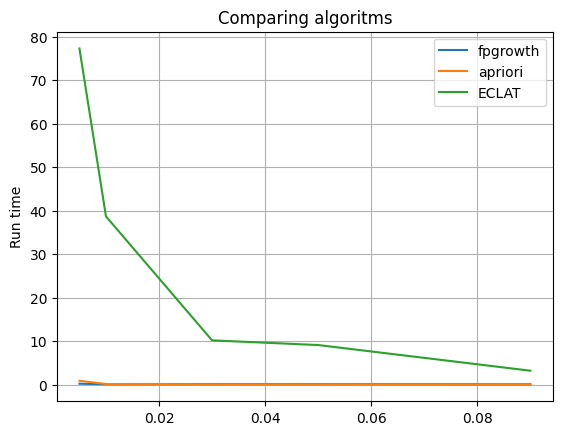

In [36]:
print(sizes, apriori_times)
plt.ylabel("Run time")
plt.title('Comparing algoritms')
plt.plot(l, fpgrowth_times1, label='fpgrowth')
plt.plot(l, apriori_times1, label='apriori')
plt.plot(l, ECLAT_times1, label='ECLAT')
plt.legend()
plt.grid(True)
plt.show()